In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set path to Figures
figures = os.path.join(os.getcwd(), 'Figures')
print("Figures will be saved in: ", figures)
if not os.path.exists(figures):
    os.makedirs(figures)

# set style for seaborn and size of figures
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [9, 6]

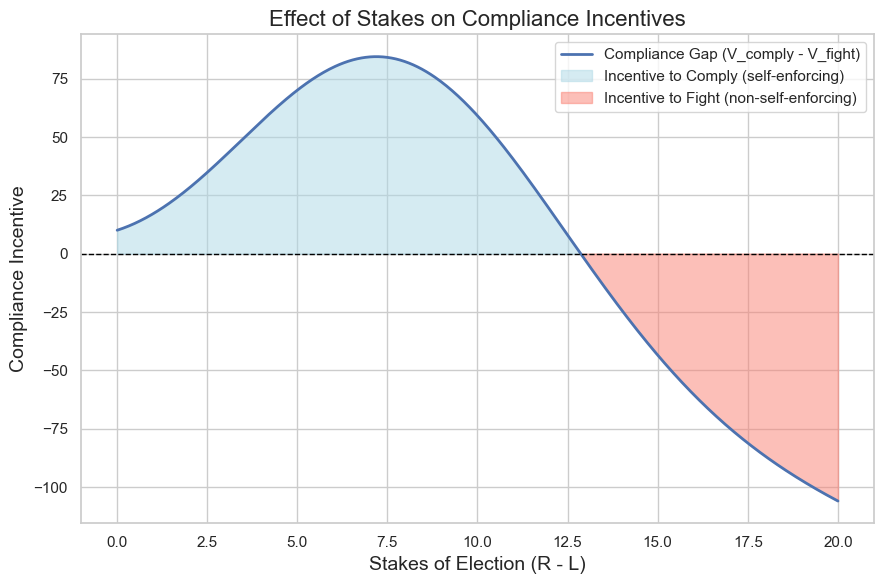

In [10]:
# Parameters
delta = 0.95   # Discount factor
p = 0.3        # Probability of violent success
c = 2          # One-time cost of fighting
k = 1          # Cost of political engagement
L = 2          # Payoff from being ruled

# Stakes must be positive (S = R - L)
stakes = np.linspace(0.01, 20, 500)

# Election win probability: hump-shaped in stakes
a = 0.9     # Peak election win probability
b = 0.02    # Width parameter
mu = 5      # Peak location of probability

# π(S): probability of winning elections
pi = a * np.exp(-b * (stakes - mu)**2)

# Compute R from stakes: R = S + L
R = stakes + L

# Lifetime payoff from complying (updated model)
V_comply = (pi * stakes + L - k) / (1 - delta)

# Lifetime payoff from fighting
V_fight = (p * R) / (1 - delta) - c

# Compliance incentive
compliance_gap = V_comply - V_fight

# Stakes where the compliance gap is (approximately) zero
zero_stakes = stakes[np.isclose(compliance_gap, 0, atol=1e-5)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(stakes, compliance_gap, label='Compliance Gap (V_comply - V_fight)', linewidth=2)
ax.axhline(0, color='black', linestyle='--', linewidth=1)

# Shading regions
ax.fill_between(stakes, compliance_gap, where=(compliance_gap > 0), color='lightblue', alpha=0.5, label='Incentive to Comply (self-enforcing)')
ax.fill_between(stakes, compliance_gap, where=(compliance_gap < 0), color='salmon', alpha=0.5, label='Incentive to Fight (non-self-enforcing)')

# Vertical line(s) at zero crossing
if zero_stakes.size > 0:
    for zs in zero_stakes:
        ax.axvline(zs, color='red', linestyle='--', linewidth=1, label='Zero Compliance Gap')

# Always add the legend
ax.legend()

# Labels and title
ax.set_xlabel('Stakes of Election (R - L)', fontsize=14)
ax.set_ylabel('Compliance Incentive', fontsize=14)
ax.set_title('Effect of Stakes on Compliance Incentives', fontsize=16)
ax.grid(True)
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(figures, 'compliance_incentives.png'), dpi=300)

plt.show()